In [1]:
from fvhoe.hydro import compute_conservatives
from fvhoe.initial_conditions import sinus, square
from fvhoe.solver import EulerSolver
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def l1err(x, y):
    return np.mean(np.abs(x - y))


def l2err(x, y):
    return np.sqrt(np.mean(np.square(x - y)))

In [3]:
def f0(x, y, z):
    return sinus(x, y, z, dims="xyz", vx=1, vy=1, vz=1)

In [4]:
data = []
for N, p in product([16, 32, 64], [0, 1, 2, 3]):
    print(f"{N=}, {p=}")
    solver = EulerSolver(
        f0,
        nx=N,
        ny=N,
        nz=N,
        px=p,
        py=p,
        pz=p,
        riemann_solver="advection_upwind",
        progress_bar=False,
        cupy=True,
    )
    solver.rkorder(1)
    rho_error = l1err(solver.snapshots[0]["rho"], solver.snapshots[1]["rho"])
    data.append(dict(N=N, p=p, err=rho_error))
df = pd.DataFrame(data)

N=16, p=0
N=16, p=1
N=16, p=2
N=16, p=3
N=32, p=0
N=32, p=1
N=32, p=2
N=32, p=3
N=64, p=0
N=64, p=1
N=64, p=2
N=64, p=3


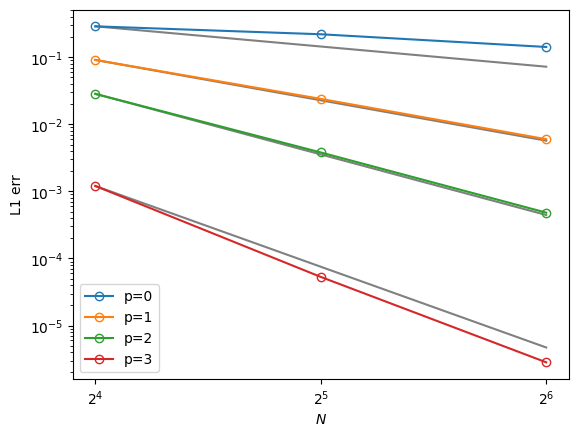

In [5]:
fig, ax = plt.subplots()

for p, dfp in df.groupby("p"):
    N0 = dfp.N.min()
    N1 = dfp.N.max()
    y0 = dfp.err.to_numpy()[0]
    ypred = y0 * ((N0 / N1) ** (p + 1))
    ax.plot([N0, N1], [y0, ypred], color="grey")
    ax.plot(dfp.N, dfp.err, label=f"{p=}", marker="o", mfc="none")

ax.set_xlabel("$N$")
ax.set_ylabel("L1 err")
ax.legend()
ax.set_xscale("log", base=2)
ax.set_yscale("log")

100%|██████████| 1.0/1 [00:11]                  

t=0.00, x=[0.02, 0.98], y=0.48, z=0.48
t=1.00, x=[0.02, 0.98], y=0.48, z=0.48


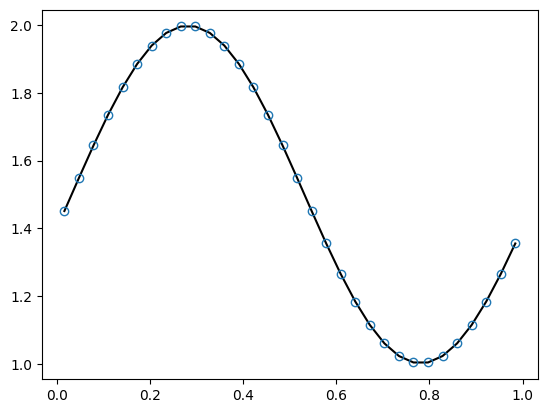

In [7]:
solver = EulerSolver(
    f0,
    nx=32,
    ny=32,
    nz=32,
    px=3,
    py=3,
    pz=3,
    riemann_solver="advection_upwind",
    progress_bar=True,
    cupy=True,
)
solver.rkorder(1)

fig, ax = plt.subplots()
solver.plot_1d_slice(ax, t=0, param="rho", color="k", y=0.5, z=0.5)
solver.plot_1d_slice(
    ax, t=1, param="rho", linestyle="none", marker="o", mfc="none", y=0.5, z=0.5
)